## Notes
This model is based off the preivous lab assignment model.

In [1]:
import tensorflow as tf
import torch

# check if GPU is being used
print("GPU Status: ", end = '')
if len(tf.config.list_physical_devices('GPU')) != 0: print("Active")
else: print("Inactive")

GPU Status: Active


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
from tensorflow import keras
import autokeras as ak

#tf version should be 2.5 or higher
tf.__version__

Using TensorFlow backend


'2.10.0'

In [3]:
#get data
(train_images, train_labels), (test_images, test_labels) = \
      keras.datasets.fashion_mnist.load_data()

In [4]:
# initialize image classifier
clf = ak.ImageClassifier(overwrite=True, max_trials=2)

# feed image classifier with training data
clf.fit(train_images, train_labels, epochs = 10)

# predict with the best model
predicted_test_images = clf.predict(test_images)
print(predicted_test_images)

# evaluate the best model with testing data
print(clf.evaluate(test_images, test_labels))

Trial 2 Complete [01h 11m 03s]
val_loss: 1.5571051836013794

Best val_loss So Far: 0.2251877784729004
Total elapsed time: 01h 12m 31s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4252 - accuracy: 0.8490
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3137 - accuracy: 0.8886
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2783 - accuracy: 0.9010
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2585 - accuracy: 0.9062
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2467 - accuracy: 0.9097
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2338 - accuracy: 0.9148
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2218 - accuracy: 0.9193
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2169 - accuracy: 0.9204
Epoch 9/10
1

INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets


INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets


313/313 [==============================] - 0s 1ms/step
[['9']
 ['2']
 ['1']
 ...
 ['8']
 ['1']
 ['5']]
313/313 [==============================] - 1s 2ms/step - loss: 0.2311 - accuracy: 0.9219
[0.23111481964588165, 0.9218999743461609]


In [5]:
clf.fit(
    train_images,
    train_labels,
    # Split the training data and use the last 15% as validation data.
    validation_split=0.15,
    epochs=10,
)

In [6]:
#evaluate
test_loss, test_acc = clf.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2311 - accuracy: 0.9219

Test accuracy: 0.9218999743461609


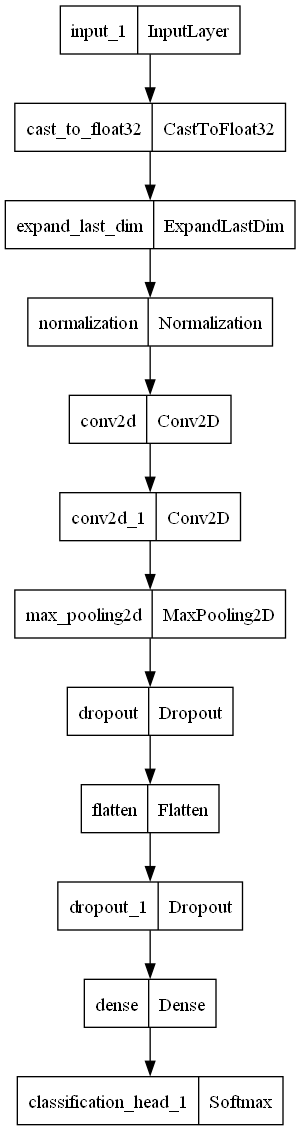

In [11]:
model = clf.export_model()

tf.keras.utils.plot_model(
    model,
    to_file='AutoKeras_model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)